In [1]:
from Utils_BLAST import *
from os import listdir
import matplotlib.pyplot as plt

rcParams = {'font.size': 12, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

In [2]:
data_dir = '/Users/harihara/Research-Activities/Data/Hot-Spring/Single_Cell_Gabe/BLAST_Hits/'
df_BLAST_Gene_Wise = pd.read_pickle(data_dir+'BLAST_Hits_Top_30_Alleles_Gene_Wise.pkl' )
df_BLAST_Gene_Wise = df_BLAST_Gene_Wise.set_index(['Gene','Sample', 'Cov', 'Type'])
df_BLAST_Sample_Wise = pd.read_pickle(data_dir+'BLAST_Hits_Top_30_Alleles_Sample_Wise.pkl')
df_BLAST_Sample_Wise = df_BLAST_Sample_Wise.set_index(['Sample', 'Cov', 'Type'])


In [3]:
data_dir = '/Users/harihara/Research-Activities/Data/Hot-Spring/Single_Cell_Gabe/BLAST_Hits_E_1e3/'
df_BLAST_1e3_Gene_Wise = pd.read_pickle(data_dir+'BLAST_1E-3_Hits_Top_30_Alleles_Gene_Wise.pkl' )
df_BLAST_1e3_Gene_Wise = df_BLAST_1e3_Gene_Wise.set_index(['Gene','Sample', 'Cov', 'Type'])
df_BLAST_1e3_Sample_Wise = pd.read_pickle(data_dir+'BLAST_1E-3_Hits_Top_30_Alleles_Sample_Wise.pkl')
df_BLAST_1e3_Sample_Wise = df_BLAST_1e3_Sample_Wise.set_index(['Sample', 'Cov', 'Type'])


/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.


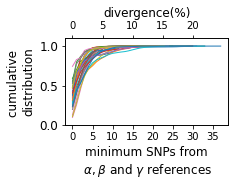

In [4]:
outpath = '/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Single_Cell_Analyses/'

plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,1, figsize = (3.43,3.43*0.8))
ax2 = ax.twiny()
alleles = df_BLAST_Gene_Wise.index.get_level_values(0).unique()
sample = 'MS50'
cov = 95
for g in alleles:
    df = df_BLAST_Gene_Wise.loc[(g,'MS50',cov, 'ABC')]
    df = df.sort_values(by = 'mismatch')
    ax.plot(df['mismatch'].tolist(), df['Normalized_Counts'].tolist() ,linewidth = 1)
    
ax.set_xlabel(r'minimum SNPs from'+'\n'+r' $\alpha, \beta $ and $\gamma$ references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel('cumulative \ndistribution')
ax.set_xticks([0, 5, 10,15, 20, 25, 30, 35])
ax.set_xticklabels([0, 5, 10,15, 20, 25, 30, 35], size = '10')

ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)
ax2.set_xticks([0/150*100, 7.5/150*100, 15/150*100, 22.5/150*100.0, 30/150*100])
ax2.set_xticklabels([int(0/150*100), int(7.5/150*100), int(15/150*100), 
                     int(22.5/150*100), int(30/150*100)], size = '10')

ax.set_ylim([0,1.1])

fig.tight_layout()
fig.savefig(outpath+'Cumulative-Distribtuion-MS50-All-Loci.pdf')

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/h

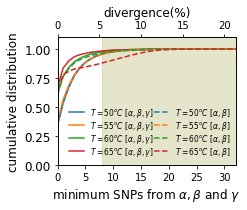

In [7]:
fig, ax = plt.subplots(1,1, figsize = (3.43,3.43*0.9))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65']
legends = [r'$T=50^oC$',r'$T=55^oC$',r'$T=60^oC$',r'$T=65^oC$']
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = legends[i] + r' [$\alpha, \beta, \gamma$]'
    df_BLAST_Sample_Wise.loc[(s, 95, 'ABC')].plot('mismatch', 'Normalized_Counts', 
            linewidth = 1.5, label = label_1, color = c, ax = ax)

for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_2 = legends[i] + r' [$\alpha, \beta$]'
    df_BLAST_Sample_Wise.loc[(s, 95, 'AB')].plot('mismatch', 'Normalized_Counts', linestyle = '--',
                            linewidth = 1.5, label = label_2, color = c, ax = ax)
    
ax.set_xlabel(r'minimum SNPs from'+r' $\alpha, \beta $ and $\gamma$')
ax2.set_xlabel('divergence(%)')
ax.set_xticks([0, 5, 10,15, 20, 25, 30, 35])
ax.set_xticklabels([0, 5, 10,15, 20, 25, 30, 35], size = '10')
ax.set_ylabel('cumulative distribution')

ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)
ax2.set_xticks([0/150*100, 7.5/150*100, 15/150*100, 22.5/150*100.0, 30/150*100])
ax2.set_xticklabels([int(0/150*100), int(7.5/150*100), int(15/150*100), 
                     int(22.5/150*100), int(30/150*100)], size = '10')

ax.set_ylim([0,1.1])
ax.set_xlim([0, 32])
ax.axvspan(8, ax.get_xlim()[1], color = 'olive', alpha = 0.2)
ax.legend(ncol = 2, loc = 4, frameon = False, fontsize = 7.5, labelspacing=0.01, columnspacing = 0.024,
         bbox_to_anchor=(1.01,0.0001))
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)

fig.tight_layout()
fig.savefig(outpath+'Cumulative-Distribtuion-All-MS-Samples.pdf')

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (18,10))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65'] 
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r' [$\alpha, \beta, \gamma$]'
    ax.plot(df_sample_grouped_ABC.loc[s].mismatch.tolist(), 
            df_sample_grouped_ABC.loc[s].Rev_Cumulative.tolist(), 
            linewidth = 3, label = label_1, color = c, marker = '<')
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_2 = s + r'$[\alpha, \beta]$'
    ax.plot(df_sample_grouped_AB.loc[s].mismatch.tolist(), 
            df_sample_grouped_AB.loc[s].Rev_Cumulative.tolist(), 
            linestyle = '--', linewidth = 3, label = label_2, color = c, marker = 'o')
ax.grid()
ax.set_xlabel(r'minimum SNPs from the references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel('cumulative distribution')
ax.semilogy()

#ax.set_ylim(-100000,800000)
ax.legend(ncol = 2, loc = 1, frameon = False)
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)

fig.tight_layout()
#fig.savefig(outpath+'Cumulative-Distribtuion-All-MS-Samples.pdf')

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (18,10))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65'] 
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r' [$\alpha, \beta, \gamma$]'
    ax.plot(df_sample_grouped_all_ABC.loc[s].mismatch.tolist(), 
            df_sample_grouped_all_ABC.loc[s].Counts.tolist(), 
            linewidth = 3, label = label_1, color = c, marker = '<')
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_2 = s + r'$[\alpha, \beta]$'
    ax.plot(df_sample_grouped_all_AB.loc[s].mismatch.tolist(), 
            df_sample_grouped_all_AB.loc[s].Counts.tolist(), 
            linestyle = '--', linewidth = 3, label = label_2, color = c, marker = 'o')
ax.grid()
ax.set_xlabel(r'minimum SNPs from the references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel(r'cumulative counts (reads mapping to all variants'+'\n'+r'[$\alpha, \beta, \gamma$])')
#ax.set_ylim(0,1.02)
#ax.set_ylim(-50000,200000)
ax.legend(ncol = 2, loc = 4, frameon = False)
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)

fig.tight_layout()
#fig.savefig(outpath+'Cumulative-Distribtuion-All-MS-Samples.pdf')

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (18,10))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65'] 
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r' [$\alpha, \beta, \gamma$]'
    ax.plot(df_sample_grouped_ABC.loc[s].mismatch.tolist(), 
            df_sample_grouped_ABC.loc[s].Counts.tolist(), 
            linewidth = 3, label = label_1, color = c, marker = '<')
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_2 = s + r'$[\alpha, \beta]$'
    ax.plot(df_sample_grouped_AB.loc[s].mismatch.tolist(), 
            df_sample_grouped_AB.loc[s].Counts.tolist(), 
            linestyle = '--', linewidth = 3, label = label_2, color = c, marker = 'o')
ax.grid()
ax.set_xlabel(r'minimum SNPs from the references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel(r'cumulative counts (all reads)')
#ax.set_ylim(0,1.02)
#ax.set_ylim(-50000,800000)
ax.legend(ncol = 2, loc = 4, frameon = False)
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)

fig.tight_layout()
#fig.savefig(outpath+'Cumulative-Distribtuion-All-MS-Samples.pdf')

In [ ]:
df_16S_Blast = pd.read_pickle('/Users/harihara/Research-Activities/Data/Hot-Spring/Single_Cell_Gabe/\
BLAST_Hits/BLAST_Hits_16S_rRNA.pkl')
df_16S_Blast['Gene'] = '16SrRNA'

In [ ]:
df_16S_grouped_ABC, df_16S_sample_grouped_ABC = Pick_Minimum_SNP(df_16S_Blast, Gene = True)
df_16S_grouped_AB, df_16S_sample_grouped_AB = Pick_Minimum_SNP(df_16S_Blast[df_16S_Blast['Allele'] != 'C'], 
                                                               Gene = True)

In [ ]:
plt.rcParams.update(rcParams)

fig, ax = plt.subplots(1,1, figsize = (18,10))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65'] 
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r' [$\alpha, \beta, \gamma$]'
    ax.plot(df_16S_sample_grouped_ABC.loc[s].mismatch.tolist(), 
            df_16S_sample_grouped_ABC.loc[s].Normalized_Counts.tolist(), 
            linewidth = 3, label = label_1, color = c, marker = '<')
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_2 = s + r'$[\alpha, \beta]$'
    ax.plot(df_16S_sample_grouped_AB.loc[s].mismatch.tolist(), 
            df_16S_sample_grouped_AB.loc[s].Normalized_Counts.tolist(), 
            linestyle = '--', linewidth = 3, label = label_2, color = c, marker = 'o')
ax.grid()
ax.set_xlabel(r'minimum SNPs from the references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel(r'cumulative counts (reads mapping to all variants'+'\n'+r'[$\alpha, \beta, \gamma$])')
#ax.set_ylim(0,1.02)
#ax.set_ylim(0,60000)
ax.legend(ncol = 2, loc = 4, frameon = False)
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)

fig.tight_layout()

In [ ]:
plt.rcParams.update(rcParams)

fig, ax = plt.subplots(1,1, figsize = (18,10))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65'] 
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r' [$\alpha, \beta, \gamma$]'
    ax.plot(df_16S_sample_grouped_ABC.loc[s].mismatch.tolist(), 
            df_16S_sample_grouped_ABC.loc[s].Counts.tolist(), 
            linewidth = 3, label = label_1, color = c, marker = '<')
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_2 = s + r'$[\alpha, \beta]$'
    ax.plot(df_16S_sample_grouped_AB.loc[s].mismatch.tolist(), 
            df_16S_sample_grouped_AB.loc[s].Counts.tolist(), 
            linestyle = '--', linewidth = 3, label = label_2, color = c, marker = 'o')
ax.grid()
ax.set_xlabel(r'minimum SNPs from the references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel(r'cumulative counts (reads mapping to all variants'+'\n'+r'[$\alpha, \beta, \gamma$])')
#ax.set_ylim(0,1.02)
ax.set_ylim(0,60000)
ax.legend(ncol = 2, loc = 4, frameon = False)
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)

fig.tight_layout()

In [ ]:
plt.rcParams.update(rcParams)

fig, ax = plt.subplots(1,2, figsize = (18, 10), sharey = True)
coverage_thresholds = ['50','75','80','85','90','95','97','100']
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8']
sample = 'MS65'
for i in range(len(coverage_thresholds)):
    c = coverage_thresholds[i]
    df_filt = df_sample_grouped_ABC[df_sample_grouped_ABC['Cov'] == c].loc[sample]
    df_filt_1e_3 = df_sample_grouped_ABC_1e3[df_sample_grouped_ABC_1e3['Cov'] == c].loc[sample]
    ax[0].plot(df_filt['mismatch'], df_filt['Normalized_Counts'], color = colors[i], label = c, linewidth = 2.5)
    ax[1].plot(df_filt_1e_3['mismatch'], df_filt_1e_3['Normalized_Counts'], color = colors[i], linewidth = 2.5)
ax[0].legend(frameon = False, ncol = 3)
fig.tight_layout()
ax[0].set_ylabel('cumulative distribtuion')
ax[0].grid()
ax[1].grid()
ax[0].set_title('BLAST '+ sample+'\n(default setting)')
ax[1].set_title('BLAST '+sample+'\n(-task nblast, -word_size 6, -evalue 1e-3)')

fig.text(0.3, 0.012, 'minimum SNPs from the references')


In [ ]:
filt = df_gene_grouped_ABC_1e3[(df_gene_grouped_ABC_1e3['Cov'] == '95') & 
                               (df_gene_grouped_ABC_1e3['Normalized_Counts'] < 0.3) & 
                               (df_gene_grouped_ABC_1e3['mismatch'] == 9)]
alleles = filt.index.get_level_values(0).unique()


In [ ]:
plt.rcParams.update(rcParams)

sample = 'MS50'
fig, ax = plt.subplots(1,2, figsize = (18, 10), sharey = True)
coverage_thresholds = ['50','75','80','85','90','95','97','100']
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8']

for i in range(len(coverage_thresholds)):
    c = coverage_thresholds[i]
    df_filt = df_gene_grouped_ABC[df_gene_grouped_ABC['Cov'] == c].loc[(alleles[1], sample)]
    df_filt_1e_3 = df_gene_grouped_ABC_1e3[df_gene_grouped_ABC_1e3['Cov'] == c].loc[(alleles[1], sample)]
    ax[0].plot(df_filt['mismatch'], df_filt['Normalized_Counts'], color = colors[i], label = c, linewidth = 2.5)
    ax[1].plot(df_filt_1e_3['mismatch'], df_filt_1e_3['Normalized_Counts'], color = colors[i], linewidth = 2.5)
ax[0].legend(frameon = False, ncol = 3)
fig.tight_layout()
ax[0].set_ylabel('cumulative distribtuion')
ax[0].grid()
ax[1].grid()
ax[0].set_title('BLAST '+ sample+', Allele '+alleles[1]+'\n(default setting)')
ax[1].set_title('BLAST '+sample+', Allele '+alleles[1]+'\n(-task nblast, -word_size 6, -evalue 1e-3)')

fig.text(0.3, 0.012, 'minimum SNPs from the references')

In [ ]:
plt.rcParams.update(rcParams)

fig, ax = plt.subplots(1,2, figsize = (18, 10), sharey = False)
coverage_thresholds = ['50','75','80','85','90','95','97','100']
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8']
sample = 'MS65'
for i in range(len(coverage_thresholds)):
    c = coverage_thresholds[i]
    df_filt = df_sample_grouped_ABC[df_sample_grouped_ABC['Cov'] == c].loc[sample]
    df_filt_1e_3 = df_sample_grouped_ABC_1e3[df_sample_grouped_ABC_1e3['Cov'] == c].loc[sample]
    ax[0].plot(df_filt['mismatch'], df_filt['Counts'], color = colors[i], label = c, linewidth = 2.5)
    ax[1].plot(df_filt_1e_3['mismatch'], df_filt_1e_3['Counts'], color = colors[i], linewidth = 2.5)
ax[0].legend(frameon = False, ncol = 3)
fig.tight_layout()
ax[0].set_ylabel('cumulative counts')
ax[0].grid()
ax[1].grid()
ax[0].set_title('BLAST '+ sample+'\n(default setting)')
ax[1].set_title('BLAST '+sample+'\n(-task nblast, -word_size 6, -evalue 1e-3)')

fig.text(0.3, 0.012, 'minimum SNPs from the references')


In [ ]:
plt.rcParams.update(rcParams)

sample = 'MS50'
fig, ax = plt.subplots(1,2, figsize = (18, 10), sharey = False)
coverage_thresholds = ['50','75','80','85','90','95','97','100']
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8']

for i in range(len(coverage_thresholds)):
    c = coverage_thresholds[i]
    df_filt = df_gene_grouped_ABC[df_gene_grouped_ABC['Cov'] == c].loc[(alleles[1], sample)]
    df_filt_1e_3 = df_gene_grouped_ABC_1e3[df_gene_grouped_ABC_1e3['Cov'] == c].loc[(alleles[1], sample)]
    ax[0].plot(df_filt['mismatch'], df_filt['Counts'], color = colors[i], label = c, linewidth = 2.5)
    ax[1].plot(df_filt_1e_3['mismatch'], df_filt_1e_3['Counts'], color = colors[i], linewidth = 2.5)
ax[0].legend(frameon = False, ncol = 3)
fig.tight_layout()
ax[0].set_ylabel('cumulative distribtuion')
ax[0].grid()
ax[1].grid()
ax[0].set_title('BLAST '+ sample+', Allele '+alleles[1]+'\n(default setting)')
ax[1].set_title('BLAST '+sample+', Allele '+alleles[1]+'\n(-task nblast, -word_size 6, -evalue 1e-3)')

fig.text(0.3, 0.012, 'minimum SNPs from the references')